In [31]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import glob
from collections import defaultdict
import os
from sklearn import svm
from sklearn.neighbors  import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.tree import export_graphviz
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold

from sklearn.utils import shuffle

from sklearn.model_selection import GridSearchCV

In [72]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Load CSV

## minmax pca97

In [81]:
train = pd.read_csv('./Training/Ready_to_train/x_train_minmax_pca_97.csv')
train = shuffle(train)
X_train = train.drop('class',axis=1)
y_train = train.iloc[:,-1]
test = pd.read_csv('./Training/Ready_to_train/x_test_minmax_pca_97.csv')
X_test=test.drop('class',axis=1)
y_test = test.iloc[:,-1]

# SVM

In [33]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
# print prediction results 
print(classification_report(y_test, model.predict(X_test)))
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72        40
           1       0.71      0.80      0.75        40
           2       1.00      1.00      1.00        32

    accuracy                           0.81       112
   macro avg       0.83      0.83      0.82       112
weighted avg       0.82      0.81      0.81       112

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1163
           1       0.90      0.96      0.92      1163
           2       0.99      0.97      0.98      1163

    accuracy                           0.94      3489
   macro avg       0.94      0.94      0.94      3489
weighted avg       0.94      0.94      0.94      3489



### confusion matrix

In [5]:
print(confusion_matrix(y_train,model.predict(X_train)))
print(accuracy_score(y_train,model.predict(X_train)))

[[1046  110    7]
 [  48 1111    4]
 [  19   19 1125]]
0.94067067927773


In [6]:
print(confusion_matrix(y_test,model.predict(X_test)))
print(accuracy_score(y_test,model.predict(X_test)))

[[27 13  0]
 [ 8 32  0]
 [ 0  0 32]]
0.8125


## Grid Search

### 1

In [7]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'kernel': ['rbf','linear','poly','sigmoid']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=5, n_jobs=-1)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             verbose=3)

In [8]:
result = pd.DataFrame(grid.cv_results_)#[['params','mean_test_score','rank_test_score']]
result.sort_values(by=['mean_test_score'],ascending=False).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,24.496912,4.185313,6.774024,2.442802,rbf,{'kernel': 'rbf'},0.825215,0.816619,0.840974,0.836676,0.820660,0.828029,0.009325,1
2,26.717976,2.539473,4.187061,1.355559,poly,{'kernel': 'poly'},0.787966,0.793696,0.803725,0.830946,0.816356,0.806538,0.015556,2


In [9]:
print(grid.best_params_)
print(grid.score(X_train,y_train))
print(grid.score(X_test,y_test))

{'kernel': 'rbf'}
0.94067067927773
0.8125


### 2

In [10]:
# defining parameter range
rng_C=np.arange(1,102,5)
param_grid = {'C': rng_C,
             'gamma': ['auto','scale',]}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,cv=5, n_jobs=-1)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210]),
                         'gamma': ['auto', 'scale']},
             verbose=3)

In [11]:
result = pd.DataFrame(grid.cv_results_)#[['params','mean_test_score','rank_test_score']]
result.sort_values(by=['mean_test_score'],ascending=False).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
21,34.456186,9.713565,10.637225,3.267618,110,scale,"{'C': 110, 'gamma': 'scale'}",0.885387,0.862464,0.893983,0.885387,0.862267,0.877897,0.013065,1
15,32.586062,8.527201,9.020760,2.929502,80,scale,"{'C': 80, 'gamma': 'scale'}",0.885387,0.862464,0.893983,0.885387,0.862267,0.877897,0.013065,1


In [12]:
print(grid.best_params_)
print(grid.score(X_train,y_train))
print(grid.score(X_test,y_test))

{'C': 10, 'gamma': 'scale'}
1.0
0.8214285714285714


In [13]:
print(classification_report(y_test, grid.predict(X_test)))
print(classification_report(y_train, grid.predict(X_train)))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77        40
           1       0.74      0.80      0.77        40
           2       0.97      0.94      0.95        32

    accuracy                           0.82       112
   macro avg       0.83      0.83      0.83       112
weighted avg       0.82      0.82      0.82       112

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1163
           1       1.00      1.00      1.00      1163
           2       1.00      1.00      1.00      1163

    accuracy                           1.00      3489
   macro avg       1.00      1.00      1.00      3489
weighted avg       1.00      1.00      1.00      3489



In [82]:
model_svc = SVC(C=10, gamma='scale', probability=True)
model_svc.fit(X_train, y_train)
# print prediction results 
print(classification_report(y_test, model_svc.predict(X_test)))
print(classification_report(y_train, model_svc.predict(X_train)))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77        40
           1       0.74      0.80      0.77        40
           2       0.97      0.94      0.95        32

    accuracy                           0.82       112
   macro avg       0.83      0.83      0.83       112
weighted avg       0.82      0.82      0.82       112

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1163
           1       1.00      1.00      1.00      1163
           2       1.00      1.00      1.00      1163

    accuracy                           1.00      3489
   macro avg       1.00      1.00      1.00      3489
weighted avg       1.00      1.00      1.00      3489



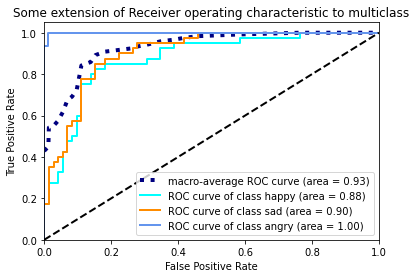

In [96]:
# Binarize the output
y_train1=label_binarize(y_train, classes=[0,1,2])
y_test1=label_binarize(y_test, classes=[0,1,2])

y_score=model_svc.decision_function(X_test)
n_classes = 3
lw=2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
emo_class=['happy','sad','angry']
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(emo_class[i], roc_auc[i]),
    )


plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM")
plt.legend(loc="lower right")
plt.show()

# RF

In [4]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train, y_train)
# print prediction results 
print(classification_report(y_test, rf_model.predict(X_test)))
print(classification_report(y_train, rf_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.59      0.47      0.53        40
           1       0.61      0.68      0.64        40
           2       0.72      0.81      0.76        32

    accuracy                           0.64       112
   macro avg       0.64      0.65      0.65       112
weighted avg       0.64      0.64      0.64       112

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1163
           1       1.00      1.00      1.00      1163
           2       1.00      1.00      1.00      1163

    accuracy                           1.00      3489
   macro avg       1.00      1.00      1.00      3489
weighted avg       1.00      1.00      1.00      3489



### confusion matrix

In [5]:
print(confusion_matrix(y_train,rf_model.predict(X_train)))
print(accuracy_score(y_train,rf_model.predict(X_train)))

[[1163    0    0]
 [   0 1163    0]
 [   0    0 1163]]
1.0


In [6]:
print(confusion_matrix(y_test,rf_model.predict(X_test)))
print(accuracy_score(y_test,rf_model.predict(X_test)))

[[19 14  7]
 [10 27  3]
 [ 3  3 26]]
0.6428571428571429


## Grid Search

In [7]:
# defining parameter range

#number of trees
n_estimators=np.arange(100,302,20)
#number of features
max_features=['auto','sqrt']
#max levels
#max_depth=None
#min number of samples to split a node
min_samples_split=np.arange(2,11,1)
#min number of samples each leaf node
min_samples_leaf=np.arange(1,11,1)
#method selecting sample for training each tree
bootstrap=[True,False]

param_grid = {'n_estimators': n_estimators,
              'max_features':max_features,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'bootstrap':bootstrap
             }

rf_Grid = GridSearchCV(rf_model, param_grid, cv=5, refit = True, verbose = 3, n_jobs=-1)

# fitting the model for grid search
rf_Grid.fit(X_train, y_train)


Fitting 5 folds for each of 3960 candidates, totalling 19800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 43.2min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed: 58.6min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed: 76.2min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 95.2min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 116.0min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed: 138.4min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed: 161.8min
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed: 190.9min
[Parallel(n_jobs=-1)]: Done 6256 tasks      | elapsed: 223.8min
[Parallel(n_jobs=-1)]: Done 7184 tasks    

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300])},
             verbose=3)

In [8]:
result = pd.DataFrame(rf_Grid.cv_results_)#[['params','mean_test_score','rank_test_score']]
result.sort_values(by=['mean_test_score'],ascending=False).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2165,43.041182,0.485595,0.118004,0.008164,False,auto,2,9,280,"{'bootstrap': False, 'max_features': 'auto', '...",0.772206,0.783668,0.772206,0.757880,0.766141,0.770420,0.008455,1
3607,41.232692,0.223832,0.117543,0.003933,False,sqrt,7,5,300,"{'bootstrap': False, 'max_features': 'sqrt', '...",0.779370,0.776504,0.769341,0.744986,0.780488,0.770138,0.013162,2


In [9]:
print(rf_Grid.best_params_)
print(rf_Grid.score(X_train,y_train))
print(rf_Grid.score(X_test,y_test))

{'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 280}
1.0
0.7589285714285714


In [89]:
rf_model1=RandomForestClassifier(bootstrap=False, max_features='sqrt', min_samples_leaf=5, min_samples_split=6, n_estimators=241)
rf_model1.fit(X_train, y_train)
# print prediction results 
print(classification_report(y_test, rf_model1.predict(X_test)))
print(classification_report(y_train, rf_model1.predict(X_train)))

              precision    recall  f1-score   support

           0       0.68      0.62      0.65        40
           1       0.67      0.75      0.71        40
           2       0.97      0.91      0.94        32

    accuracy                           0.75       112
   macro avg       0.77      0.76      0.76       112
weighted avg       0.76      0.75      0.75       112

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1163
           1       1.00      1.00      1.00      1163
           2       1.00      1.00      1.00      1163

    accuracy                           1.00      3489
   macro avg       1.00      1.00      1.00      3489
weighted avg       1.00      1.00      1.00      3489



In [91]:
rf_model1=RandomForestClassifier(bootstrap=False, max_features='auto', min_samples_leaf=2, min_samples_split=9, n_estimators=280)
rf_model1.fit(X_train, y_train)
# print prediction results 
print(classification_report(y_test, rf_model1.predict(X_test)))
print(classification_report(y_train, rf_model1.predict(X_train)))

D:\IDEs\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

           0       0.68      0.65      0.67        40
           1       0.68      0.75      0.71        40
           2       0.93      0.88      0.90        32

    accuracy                           0.75       112
   macro avg       0.77      0.76      0.76       112
weighted avg       0.75      0.75      0.75       112

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1163
           1       1.00      1.00      1.00      1163
           2       1.00      1.00      1.00      1163

    accuracy                           1.00      3489
   macro avg       1.00      1.00      1.00      3489
weighted avg       1.00      1.00      1.00      3489



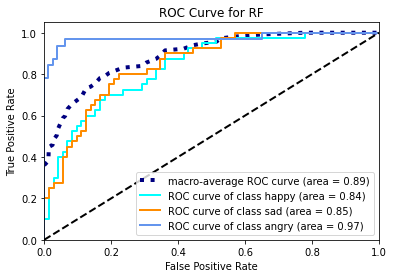

In [98]:
# Binarize the output
y_train1=label_binarize(y_train, classes=[0,1,2])
y_test1=label_binarize(y_test, classes=[0,1,2])

y_score=rf_model1.predict_proba(X_test)
n_classes = 3
lw=2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(emo_class[i], roc_auc[i]),
    )


plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for RF")
plt.legend(loc="lower right")
plt.show()